#Improving Computer Vision Accuracy using Convolutions

지금까지 Deep Neural Network (DNN) 를 이용해서 패션 mnist 를 분류했다.  

정확도가, 트레이닝셋은 89% 정도이고 테스트셋으로는  87% 정도가 나왔다.

이제 Convolutional Neural Networks 이용해서 정확도를 향상시켜본다.




In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[ 0 , :, : ]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [8]:
y_train[0]

9

In [10]:
X_train = X_train / 255.0

In [13]:
X_test = X_test / 255.0

In [15]:
X_train.shape

(60000, 28, 28)

In [ ]:
# 칼라이미지이든 그레이스케일 이미지든 전부 처리할수 있는 인공지능 개발 위해
# 4차원으로 reshape 한다.

In [17]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [21]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [22]:
# 모델링

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [29]:
from typing import Sequence
def build_model():
  model = Sequential()
  model.add( Conv2D(filters=64, kernel_size=(3,3), activation='relu' , input_shape=(28,28,1))  )
  model.add( MaxPooling2D(pool_size=(2, 2) , strides=2  )  )
  model.add( Conv2D(filters=64, kernel_size=(2,2), activation='relu')  )
  model.add( MaxPooling2D(pool_size=(2, 2) , strides=2  )  )
  model.add( Flatten() )
  model.add( Dense(128, 'relu')  )
  model.add( Dense(10, 'softmax')  )
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [30]:
model = build_model()

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [32]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

In [33]:
epoch_history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/1000
1500/1500 [==============================] - 11s 4ms/step - loss: 0.4455 - accuracy: 0.8409 - val_loss: 0.3203 - val_accuracy: 0.8860
Epoch 2/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2941 - accuracy: 0.8930 - val_loss: 0.2692 - val_accuracy: 0.9033
Epoch 3/1000
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2491 - accuracy: 0.9083 - val_loss: 0.2775 - val_accuracy: 0.8982
Epoch 4/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2171 - accuracy: 0.9202 - val_loss: 0.2518 - val_accuracy: 0.9060
Epoch 5/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1885 - accuracy: 0.9312 - val_loss: 0.2407 - val_accuracy: 0.9099
Epoch 6/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1658 - accuracy: 0.9375 - val_loss: 0.2306 - val_accuracy: 0.9186
Epoch 7/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1426 - accuracy: 0.9475 - val_loss: 0.2472 

In [34]:
import matplotlib.pyplot as plt

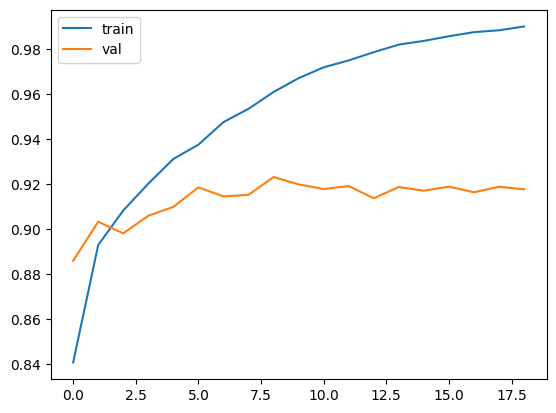

In [35]:
plt.plot(epoch_history.history['accuracy'])
plt.plot(epoch_history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4892 - accuracy: 0.9167


[0.4891599714756012, 0.916700005531311]

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [40]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [43]:
y_pred = y_pred.argmax(axis=1)

In [44]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [45]:
confusion_matrix(y_test, y_pred)

array([[873,   0,  14,  16,   2,   2,  85,   0,   8,   0],
       [  3, 982,   0,   6,   4,   0,   1,   0,   4,   0],
       [ 24,   0, 859,   9,  53,   0,  52,   0,   3,   0],
       [ 20,   8,   9, 930,  13,   0,  13,   0,   5,   2],
       [  1,   0,  54,  32, 862,   0,  47,   0,   3,   1],
       [  0,   0,   0,   0,   0, 980,   0,  15,   0,   5],
       [100,   0,  49,  36,  54,   0, 744,   1,  16,   0],
       [  0,   0,   0,   0,   0,   5,   0, 981,   0,  14],
       [  3,   0,   1,   3,   1,   1,   0,   2, 989,   0],
       [  0,   0,   0,   0,   0,   5,   0,  28,   0, 967]])

트레이닝셋은 93% , 테스트셋은 91% 까지 나온다.


에포크를 20까지 해보면, 트레이닝셋 정확도는 올라가지만 밸리데이션 정확도는 내려간다. 즉, 오버핏팅이 된다.







```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```


다음처럼 모델링 해서 돌려보자


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


convolution 레이어 셋팅



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```


DNN 구조를 붙이기 위해, 플래튼 한다.

```
  tf.keras.layers.Flatten(),
```


128 dense layers 와 10 output layers 를 셋팅한다.



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


컴파일하여 학습하고, 평가해 보자



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```
